# Interaction Energy with different optimizers
Now we will plot the energy values of the simulation performed with different bases and different optimizers. Since we parallelized the program with respect to the distances, it may happen that a process finished before another one that started before, i.e. we may find the energies in the wrong order in the file

In [50]:
import os

# List of input file paths
file_paths_LiH = [
    '/home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_321g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_631g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_CG_22-6-2025_18_4_0.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_321g_parity_CG_22-6-2025_18_4_0.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_631g_parity_CG_22-6-2025_18_4_0.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_CG_22-6-2025_18_4_0.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_321g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_631g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_ADAM_22-6-2025_16_44_20.txt'
]

for path in file_paths_LiH:
    with open(path, 'r') as f:
        lines = f.readlines()

    # Keep header or malformed lines separately if needed
    valid_lines = []
    header_lines = []

    for line in lines:
        tokens = line.split()
        if len(tokens) == 0:
            header_lines.append(line)
            continue
        elif tokens[0] == 'Total':
            header_lines.append(line.rstrip() + '\n')
            continue
        try:
            float(tokens[0])  # Validate first token is a number
            valid_lines.append(line)
        except ValueError:
            header_lines.append(line)

    # Sort valid lines by the first token (converted to float)
    sorted_lines = sorted(valid_lines, key = lambda line: float(line.split()[0]))

    # Combine with headers (on top)
    final_lines = header_lines + sorted_lines

    # Output file path
    new_path = path.replace('.txt', '_sorted.txt')

    # Write to new file
    # with open(new_path, 'w') as f:
    #     f.writelines(final_lines)

    # print(f"Sorted file written to: {new_path}")

    with open(path, 'w') as f:
        f.writelines(final_lines)

    print(f"Sorted file written to: {path}")


Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_321g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_631g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_CG_22-6-2025_18_4_0.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_321g_parity_CG_22-6-2025_18_4_0.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_631g_parity_CG_22-6-2025_18_4_0.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_CG_22-6-2025_18_4_0.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_ADAM_22-6-2025_16_44_20.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_321g_pari

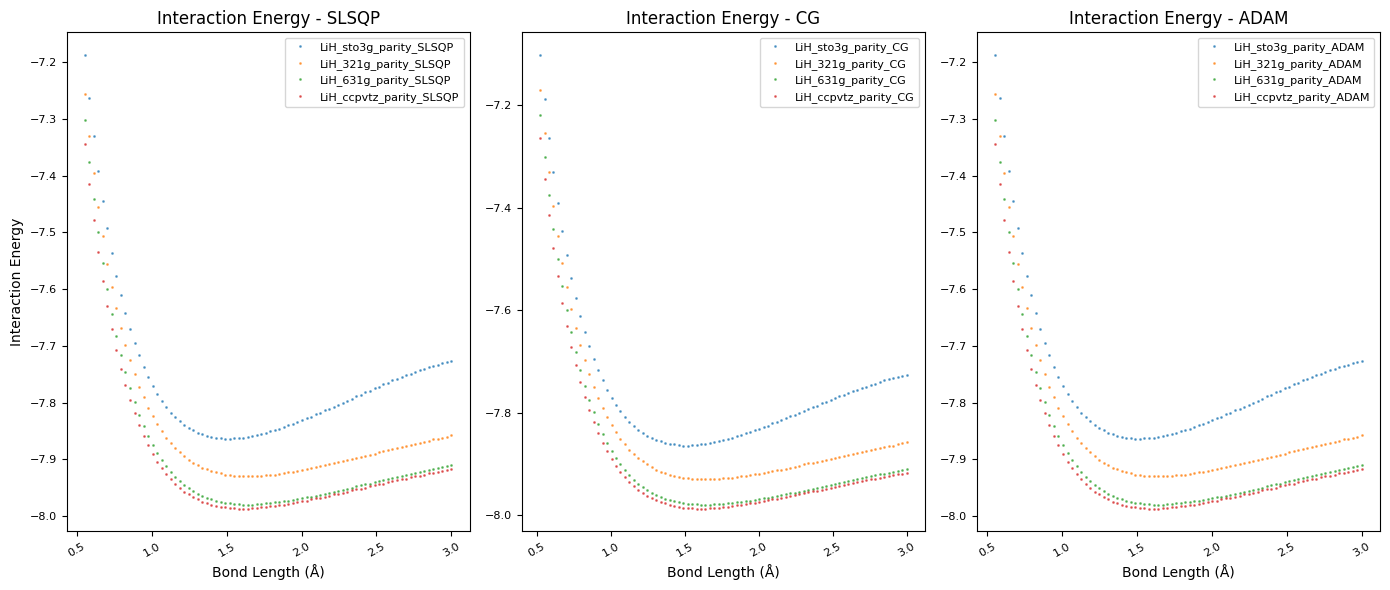

In [51]:
import matplotlib.pyplot as plt
import os

title = 'Interaction Energy'
optimizer_list = ['SLSQP', 'CG', 'ADAM']

energies_LiH = {}
q_eigenval_LiH = {}
c_eigenval_LiH = {}
distances_LiH = {}

fig, axes = plt.subplots(1, 3, figsize = (14, 6))
# Parse data from each file
for i, optimizer in enumerate(optimizer_list):
    # Process 4 files per optimizer (files i*4 to i*4+3)
    start_idx = i * 4
    end_idx = start_idx + 4
    
    for path in file_paths_LiH[start_idx:end_idx]:
        filename = os.path.basename(path)
       
        # Extract basis from filename
        parts = filename.split('_')
        molecule        = parts[1]
        basis           = parts[2]
        mapper          = parts[3]
        optimizer_name  = parts[4]
        
        key = f"{molecule}_{basis}_{mapper}_{optimizer_name}"
        
        energies_LiH[key] = []
        q_eigenval_LiH[key] = []
        c_eigenval_LiH[key] = []
        distances_LiH[key] = []
        
        with open(path, 'r') as file:
            for line in file:
                tokens = line.split()
                if len(tokens) > 11 and tokens[0] != 'Total':
                    try:
                        distances_LiH[key].append(float(tokens[0]))
                        energies_LiH[key].append(round(float(tokens[5]), 3))
                        q_eigenval_LiH[key].append(round(float(tokens[7].rstrip(')')), 5))
                        c_eigenval_LiH[key].append(round(float(tokens[11]), 5))
                    except (ValueError, IndexError):
                        continue

    # Debug purposes
    # if i == 2:
    #     check = True
    
    # Plotting for the current optimizer
    for key in energies_LiH:
        if optimizer in key:
            skip = 17
            d = distances_LiH[key][skip:]
            e = energies_LiH[key][skip:]
            
            # Create a cleaner label (just the basis name)
            basis_name = key.split('_')[1]  # Extract basis from key
            axes[i].plot(d, e, 'o', markersize = 1, alpha = 0.6, label = f'{molecule}_{basis_name}_{mapper}_{optimizer}')
    
    axes[i].set_title(f"{title} - {optimizer}")
    axes[i].set_xlabel("Bond Length (Å)")
    if i == 0:
        axes[i].set_ylabel(f"{title}")
    axes[i].tick_params(axis = 'x', labelsize = 8, rotation = 30)
    axes[i].tick_params(axis = 'y', labelsize = 8)
    axes[i].legend(fontsize = 8)

plt.tight_layout()
plt.show()


Collecting Li2 and H2 energies at high distance (1e4)

In [52]:
import os

# List of input file paths
file_paths_Li2H2 = [
    '/home/tommi/venvs/outputLi2H2/results_H2_sto3g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_321g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_631g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_ccpvtz_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_sto3g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_321g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_631g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_ccpvtz_parity_SLSQP_26-6-2025_10_57_59.txt'
]

energies_Li2H2 = {}
q_eigenval_Li2H2 = {}
c_eigenval_Li2H2 = {}
for path in file_paths_Li2H2:
    filename = os.path.basename(path)
    
    # Extract basis from filename (assumes format: results_<basis>_<mapper>_<time>.txt)
    parts     = filename.split('_')
    molecule  = parts[1]
    basis     = parts[2]
    mapper    = parts[3]
    optimizer = parts[4]

    key =  molecule + '_' + basis  + '_' + mapper + '_' + optimizer

    energies_Li2H2[key] = 0
    q_eigenval_Li2H2[key] = 0
    c_eigenval_Li2H2[key] = 0

    with open(path, 'r') as file:
        for line in file:
            tokens = line.split()
            if len(tokens) > 4 and tokens[0] != 'Total':
                try:
                    energies_Li2H2[key] = round(float(tokens[2]), 5)
                    q_eigenval_Li2H2[key] = round(float(tokens[4].rstrip(')')), 5)
                    c_eigenval_Li2H2[key] = round(float(tokens[8].strip('+j0)').lstrip('(')), 5)

                except ValueError:
                    continue  # skip invalid lines

# print(energies_Li2H2, q_eigenval_Li2H2, c_eigenval_Li2H2)


Calculation of H and Li ground state, i.e. division by 2 of the previously fetched values

In [53]:
gs_energy = {}

for key in energies_Li2H2:
    gs_energy[key] = energies_Li2H2[key] / 2

print(gs_energy)

{'H2_sto3g_parity_SLSQP': -0.46658, 'H2_321g_parity_SLSQP': -0.487135, 'H2_631g_parity_SLSQP': -0.488125, 'H2_ccpvtz_parity_SLSQP': -0.48405, 'Li2_sto3g_parity_SLSQP': -7.182825, 'Li2_321g_parity_SLSQP': -7.37797, 'Li2_631g_parity_SLSQP': -7.32197, 'Li2_ccpvtz_parity_SLSQP': -7.32731}


Now we have found the ground state of the single atoms. Theoretically, the sum of the single atom energies is higher than the molecule energy. Let's see if this is the case. In order to simplify the analysis, we are creating a new dictionary where each key is a basis and the elements are the the H2 and Li2

In [54]:
energy_dict = {}
for key in gs_energy:
    parts = key.split('_')

    # creating a dictionary where each key is a basis
    if parts[1] not in energy_dict:
        energy_dict[parts[1]] = {'H2': 0, 'Li2': 0}

    if energy_dict[parts[1]][parts[0]] == 0:
        energy_dict[parts[1]][parts[0]] = gs_energy[key]

print(energy_dict)


{'sto3g': {'H2': -0.46658, 'Li2': -7.182825}, '321g': {'H2': -0.487135, 'Li2': -7.37797}, '631g': {'H2': -0.488125, 'Li2': -7.32197}, 'ccpvtz': {'H2': -0.48405, 'Li2': -7.32731}}


Let's now sum the energy associated to each basis atom and see if it is lower than the molecule LiH (we will compare these values with the minimum of the curve previously obtained)

In [55]:
import numpy as np

en_min_LiH = {}
for key in energies_LiH:
    parts = key.split('_')

    # creating a dictionary where each key is a basis
    if parts[3] == 'SLSQP':
        en_min_LiH[parts[1]] = energies_LiH[key]

min_vals = {}
for key in en_min_LiH:
    min_val = min(en_min_LiH[key])

    idx = en_min_LiH[key].index(min_val)
    # print(idx)

    min_vals[key] = (min_val, idx)

# print(min_vals)

energy_sum = {}
for key in energy_dict:
    if key not in energy_sum:
        energy_sum[key] = sum(energy_dict[key].values())

# print(energy_sum)

start = 0.01
end = 3
steps = 100
d = np.linspace(start, end, steps)
for key in energy_sum:
    if energy_sum[key] > min_vals[key][0]: print(f'{energy_sum[key]} < {min_vals[key]}, {d[min_vals[key][1]]} Å')


-7.649405 < (-7.864, 48), 1.45969696969697 Å
-7.865105000000001 < (-7.93, 52), 1.5805050505050506 Å
-7.8100950000000005 < (-7.98, 52), 1.5805050505050506 Å
-7.81136 < (-7.987, 51), 1.5503030303030305 Å


where the index printed are the position in the list where the minimum lies (such index is used to find the distance between the atoms).

We have obtained that, whatever the basis used for the simulation, the overall molecule is more stable (i.e. ground state has lower energy) than the two atoms isolated. The binding energy is defined as the difference between the ground state between the two atoms and the molecule

In [56]:
binding_en = {}
for key in energy_sum:
    if key not in binding_en:
        binding_en[key] = energy_sum[key] - en_min_LiH[key][0]

print(binding_en)

{'sto3g': -33.412405, '321g': -33.305105000000005, '631g': -33.181095, 'ccpvtz': -33.03736}


Since the scientific [reference](https://indico.in2p3.fr/event/2481/contributions/24469/attachments/19766/24292/ID_72_poster_A0.pdf) we have is checking at the distance of 1.64 Å, let us see at that length how the energy behaves

In [57]:
# print(d)

d_round = np.round(d, 2)
# print(d_round)

val = 1.64
idx = np.where(d_round == val)[0]
print(idx)

for key in en_min_LiH:
    print(en_min_LiH[key][idx[0]])

[54]
-7.859
-7.93
-7.98
-7.986


We can see that the values are essentially coincident with the ones found with the min() function. In fact, the index changes just by 3 or 4 digits

# Plot of optimizers calculation difference
We have seen that the different optimizers with different bases may lead to a different result. Let's see how much.

# Classical v. Quantum eigenvalue plot
We have calculated via the VQE and the NumpyEigensolver the eigenvalue associated to the specific distance between the molecules of Li and H. Let us now plot them and see whether there are differences or not

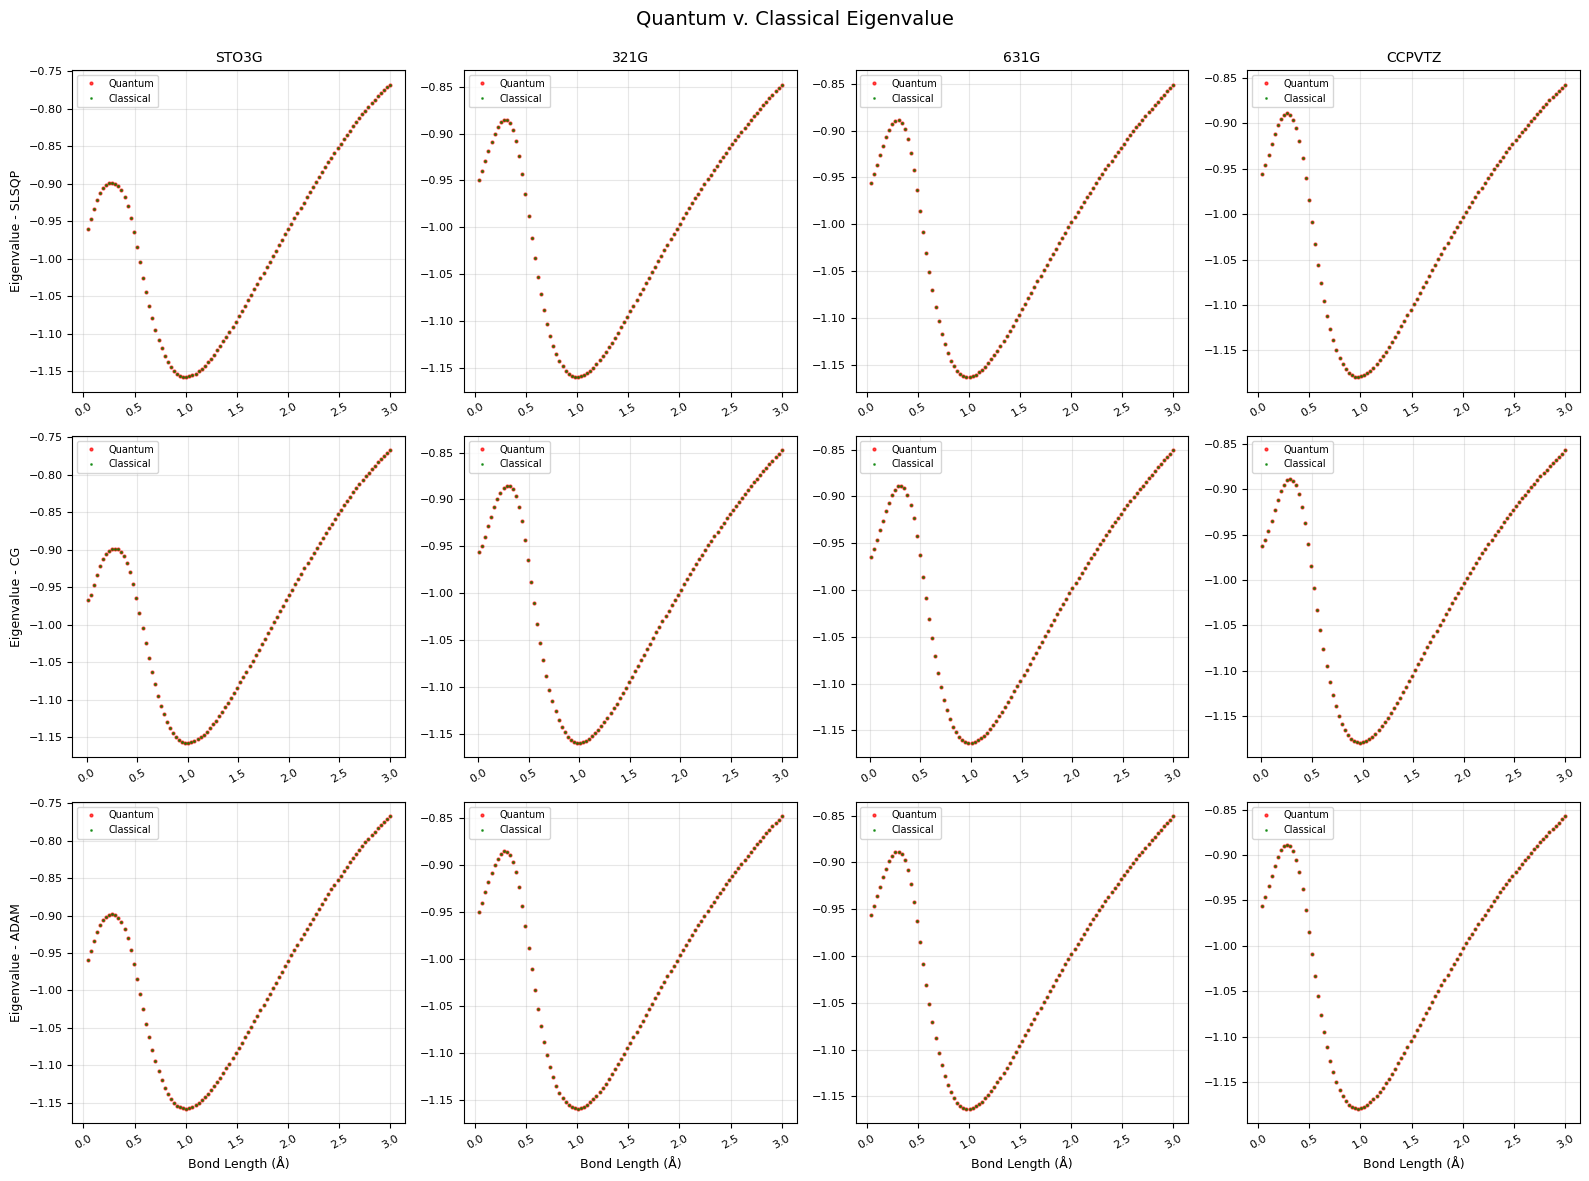

Available simulation keys:
  LiH_321g_parity_ADAM
  LiH_321g_parity_CG
  LiH_321g_parity_SLSQP
  LiH_631g_parity_ADAM
  LiH_631g_parity_CG
  LiH_631g_parity_SLSQP
  LiH_ccpvtz_parity_ADAM
  LiH_ccpvtz_parity_CG
  LiH_ccpvtz_parity_SLSQP
  LiH_sto3g_parity_ADAM
  LiH_sto3g_parity_CG
  LiH_sto3g_parity_SLSQP


In [62]:
title = 'Quantum v. Classical Eigenvalue'
optimizer_list = ['SLSQP', 'CG', 'ADAM']
basis_list = ['sto3g', '321g', '631g', 'ccpvtz']

# Create a 3x4 grid (3 optimizers x 4 basis sets)
fig, axes = plt.subplots(len(optimizer_list), len(basis_list), figsize = (16, 12))

# Ensure axes is always 2D for consistent indexing
if len(optimizer_list) == 1:
    axes = axes.reshape(1, -1)
if len(basis_list) == 1:
    axes = axes.reshape(-1, 1)

# Iterate through optimizers (rows)
for opt_idx, optimizer in enumerate(optimizer_list):
    # Iterate through basis sets (columns)
    for basis_idx, basis in enumerate(basis_list):
        
        # Find the matching simulation key
        matching_key = None
        for simulation_key in q_eigenval_LiH.keys():
            parts = simulation_key.split('_')
            if len(parts) >= 4:
                key_molecule = parts[0]
                key_basis = parts[1]
                key_mapper = parts[2]
                key_optimizer = parts[3]
                
                # Check if this key matches current optimizer and basis
                if key_optimizer == optimizer and key_basis == basis:
                    matching_key = simulation_key
                    break
        
        # If we found a matching simulation, plot it
        if matching_key:
            skip = 0
            d = distances_LiH[matching_key][skip:]
            eq = q_eigenval_LiH[matching_key][skip:]
            ec = c_eigenval_LiH[matching_key][skip:]
            
            # Plot quantum and classical eigenvalues
            axes[opt_idx][basis_idx].plot(d, eq, 'o', markersize = 2, alpha = 0.7, label = 'Quantum', color = 'red')
            axes[opt_idx][basis_idx].plot(d, ec, 'o', markersize = 1, alpha = 0.7, label = 'Classical', color = 'green')
            
            # Set title for each subplot
            if opt_idx == 0:
                axes[opt_idx][basis_idx].set_title(f"{basis.upper()}", fontsize = 10)
            
            # Set labels
            if basis_idx == 0:  # Only leftmost column gets y-label
                axes[opt_idx][basis_idx].set_ylabel(f"Eigenvalue - {optimizer}", fontsize = 9)
            if opt_idx == len(optimizer_list) - 1:  # Only bottom row gets x-label
                axes[opt_idx][basis_idx].set_xlabel("Bond Length (Å)", fontsize = 9)
            
            # Formatting
            axes[opt_idx][basis_idx].tick_params(axis = 'x', labelsize = 8, rotation = 30)
            axes[opt_idx][basis_idx].tick_params(axis = 'y', labelsize = 8)
            axes[opt_idx][basis_idx].legend(fontsize = 7)
            axes[opt_idx][basis_idx].grid(True, alpha = 0.3)

# Add overall title
fig.suptitle(title, fontsize = 14, y = 0.98)

plt.tight_layout()
plt.subplots_adjust(top = 0.93)  # Make room for the main title
plt.show()

# Optional: Print available simulation keys for debugging
print("Available simulation keys:")
for key in sorted(q_eigenval_LiH.keys()):
    print(f"  {key}")